In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as pl
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
path = './data/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data/.DS_Store
./data/contract/rental/.DS_Store
./data/contract/rental/Tibco_TranslatedToEnglish copy 8.txt
./data/contract/rental/Tibco_TranslatedToEnglish copy.txt
./data/contract/rental/Tibco_TranslatedToEnglish.txt
./data/contract/rental/Tibco_TranslatedToEnglish copy 6.txt
./data/contract/rental/Tibco_TranslatedToEnglish copy 7.txt
./data/contract/rental/Tibco_TranslatedToEnglish copy 5.txt
./data/contract/rental/Tibco_TranslatedToEnglish copy 4.txt
./data/contract/rental/Tibco_TranslatedToEnglish copy 3.txt
./data/contract/rental/Tibco_TranslatedToEnglish copy 2.txt
./data/contract/inbound/ACME Company_ShortFormGCA copy 8.txt
./data/contract/inbound/.DS_Store
./data/contract/inbound/ACME Company_ShortFormGCA.txt
./data/contract/inbound/ACME Company_ShortFormGCA copy.txt
./data/contract/inbound/ACME Company_ShortFormGCA copy 3.txt
./data/contract/inbound/ACME Company_ShortFormGCA copy 2.txt
./data/contract/inbound/ACME Company_ShortFormGCA copy 6.txt
./data/contract/inbound/ACME

In [124]:
import os
import glob

In [125]:
files='./data/contract/'

In [126]:
os.listdir(files)

['rental', 'inbound', 'outbound']

In [127]:
from collections import defaultdict
dicts=defaultdict(list)

for dir_name,_,file_names in os.walk(files):
    for file in file_names:
        dicts['categories'].append(os.path.basename(dir_name))
        name=os.path.splitext(file)[0]
        dicts['doc_id'].append(name)
        path=os.path.join(dir_name,file)
        
        with open(path,'r',encoding='latin-1') as file:
            dicts['text'].append(file.read())

In [128]:
df=pd.DataFrame.from_dict(dicts)

In [129]:
df

,categories,doc_id,text
0,rental,.DS_Store,   Bud1            %                      ...
1,rental,Tibco_TranslatedToEnglish copy 8,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
2,rental,Tibco_TranslatedToEnglish copy,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
3,rental,Tibco_TranslatedToEnglish,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
4,rental,Tibco_TranslatedToEnglish copy 6,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
5,rental,Tibco_TranslatedToEnglish copy 7,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
6,rental,Tibco_TranslatedToEnglish copy 5,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
7,rental,Tibco_TranslatedToEnglish copy 4,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
8,rental,Tibco_TranslatedToEnglish copy 3,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
9,rental,Tibco_TranslatedToEnglish copy 2,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...


In [130]:
index_names = df[ df['doc_id'] == ".DS_Store" ].index
df.drop(index_names, inplace = True)
df

,categories,doc_id,text
1,rental,Tibco_TranslatedToEnglish copy 8,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
2,rental,Tibco_TranslatedToEnglish copy,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
3,rental,Tibco_TranslatedToEnglish,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
4,rental,Tibco_TranslatedToEnglish copy 6,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
5,rental,Tibco_TranslatedToEnglish copy 7,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
6,rental,Tibco_TranslatedToEnglish copy 5,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
7,rental,Tibco_TranslatedToEnglish copy 4,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
8,rental,Tibco_TranslatedToEnglish copy 3,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
9,rental,Tibco_TranslatedToEnglish copy 2,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
10,inbound,ACME Company_ShortFormGCA copy 8,ï»¿tibco_logo-2x \n ...


In [131]:
df.reset_index(drop=True,inplace=True)
df.head(10)

,categories,doc_id,text
0,rental,Tibco_TranslatedToEnglish copy 8,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
1,rental,Tibco_TranslatedToEnglish copy,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
2,rental,Tibco_TranslatedToEnglish,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
3,rental,Tibco_TranslatedToEnglish copy 6,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
4,rental,Tibco_TranslatedToEnglish copy 7,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
5,rental,Tibco_TranslatedToEnglish copy 5,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
6,rental,Tibco_TranslatedToEnglish copy 4,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
7,rental,Tibco_TranslatedToEnglish copy 3,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
8,rental,Tibco_TranslatedToEnglish copy 2,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
9,inbound,ACME Company_ShortFormGCA copy 8,ï»¿tibco_logo-2x \n ...


In [132]:
df.drop('doc_id',axis=1,inplace=True)
df.head(10)

,categories,text
0,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
1,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
2,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
3,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
4,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
5,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
6,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
7,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
8,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...
9,inbound,ï»¿tibco_logo-2x \n ...


In [133]:
import random
print(df['text'][1])

ï»¿EXEMPLARY FOR THE LESSOR
         
        
                
        LEASE CONTRACT FOR USE OTHER THAN AS A DWELLING 


        TAXED BY VAT.


        IDENTIFICATION OF THE PREMISES THAT ARE THE OBJECT OF THE CONTRACT:




LOCAL DESTINED TO WAREHOUSE AND OFFICES.


C/ ____________ NÂº_________


City: ____ Province: ____.  
        
CADASTRAL REFERENCE: __ __
                
                In ____, at ____, on the month of October two thousand to ____.
                Meeting on behalf of the TENANT _______________, of legal age, resident of _______________, c/ _____________ nÂº __, with NIF: 36.978.645-G, acting as joint and several Administrator of the company _______________, S.L." with CIF: B-_______________, domiciled at _______________.
                    And on the other party as LESSOR, _______________________________, of legal age, single, resident of _______________, with ID: ___.___-_.
                Both parties have contracted the lease of the premises identified i

In [134]:
random.sample(range(df.text.shape[0]),5)

[23, 6, 4, 22, 9]

/Users/sahanaramesh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


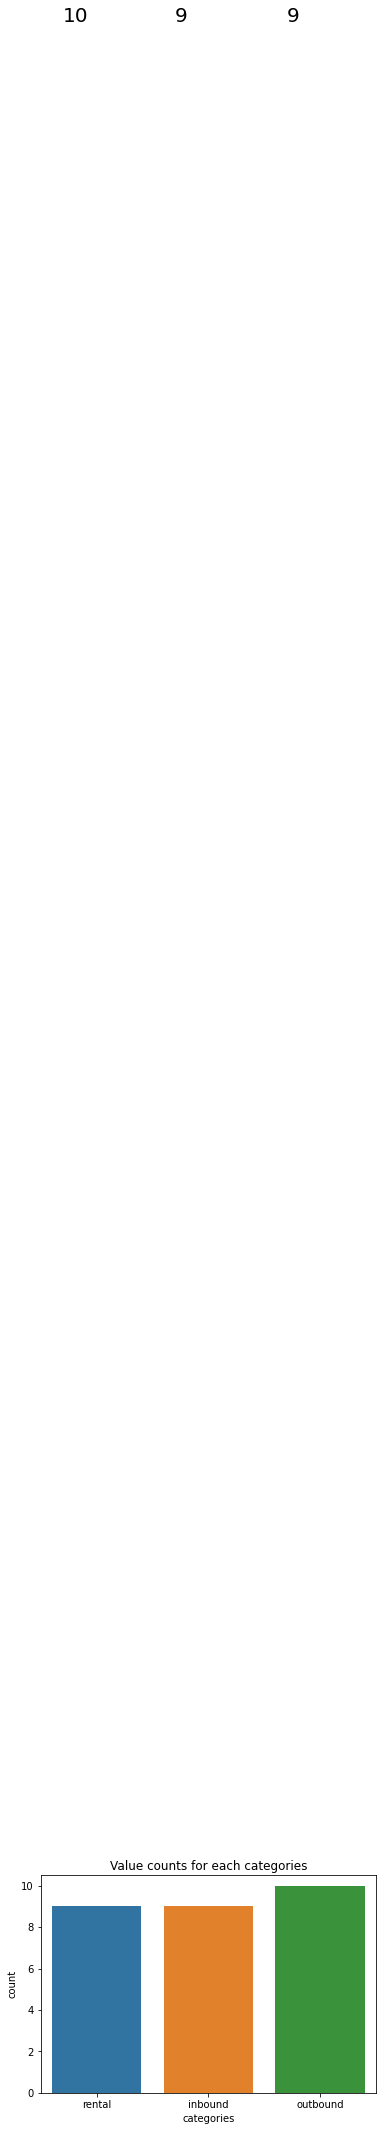

In [135]:
ax=sns.countplot(df['categories'])
for i,j in enumerate(df['categories'].value_counts().values):
    ax.text(i-0.3,100,j,fontsize=20)
pl.title('Value counts for each categories')
pl.show()

In [136]:
' '.join( df['text'][0].split('\n')[1:])

'                                            LEASE CONTRACT FOR USE OTHER THAN AS A DWELLING            TAXED BY VAT.           IDENTIFICATION OF THE PREMISES THAT ARE THE OBJECT OF THE CONTRACT:     LOCAL DESTINED TO WAREHOUSE AND OFFICES.   C/ ____________ NÂº_________   City: ____ Province: ____.            CADASTRAL REFERENCE: __ __                                  In ____, at ____, on the month of October two thousand to ____.                 Meeting on behalf of the TENANT _______________, of legal age, resident of _______________, c/ _____________ nÂº __, with NIF: 36.978.645-G, acting as joint and several Administrator of the company _______________, S.L." with CIF: B-_______________, domiciled at _______________.                     And on the other party as LESSOR, _______________________________, of legal age, single, resident of _______________, with ID: ___.___-_.                 Both parties have contracted the lease of the premises identified in the heading of this contr

In [137]:
' '.join( df['text'][0].split('\n'))

'ï»¿EXEMPLARY FOR THE LESSOR                                             LEASE CONTRACT FOR USE OTHER THAN AS A DWELLING            TAXED BY VAT.           IDENTIFICATION OF THE PREMISES THAT ARE THE OBJECT OF THE CONTRACT:     LOCAL DESTINED TO WAREHOUSE AND OFFICES.   C/ ____________ NÂº_________   City: ____ Province: ____.            CADASTRAL REFERENCE: __ __                                  In ____, at ____, on the month of October two thousand to ____.                 Meeting on behalf of the TENANT _______________, of legal age, resident of _______________, c/ _____________ nÂº __, with NIF: 36.978.645-G, acting as joint and several Administrator of the company _______________, S.L." with CIF: B-_______________, domiciled at _______________.                     And on the other party as LESSOR, _______________________________, of legal age, single, resident of _______________, with ID: ___.___-_.                 Both parties have contracted the lease of the premises identified 

In [138]:
def returnTitle(data):
    data=data.split('\n')[0]
    return data
def returnArticle(data):
    data=' '.join(data.split('\n')[1:])
    return data

    
df['title']=df['text'].apply(lambda x:returnTitle(x))
df['article']=df['text'].apply(lambda x: returnArticle(x))

In [139]:
print(returnArticle('My name is\n Sahana Ramesh\n I live in Sunnyvale'))

 Sahana Ramesh  I live in Sunnyvale


In [140]:
df.head()

,categories,text,title,article
0,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,LE...
1,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,LE...
2,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,LE...
3,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,LE...
4,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,LE...


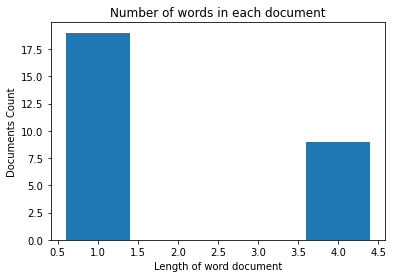

In [141]:
wordlength=dict(df['title'].str.split().apply(len).value_counts())
pl.bar(list(wordlength.keys()),list(wordlength.values()))
pl.xlabel('Length of word document')
pl.ylabel('Documents Count')
pl.title('Number of words in each document')
pl.show()

In [142]:
import nltk

In [143]:
words={}
for i in df['title']:
    for j in i.split():
        words[j]=0
        
for i in df['title']:
    for j in i.split():
        words[j]+=1

In [144]:
toptitles=nltk.FreqDist(words)

/Users/sahanaramesh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


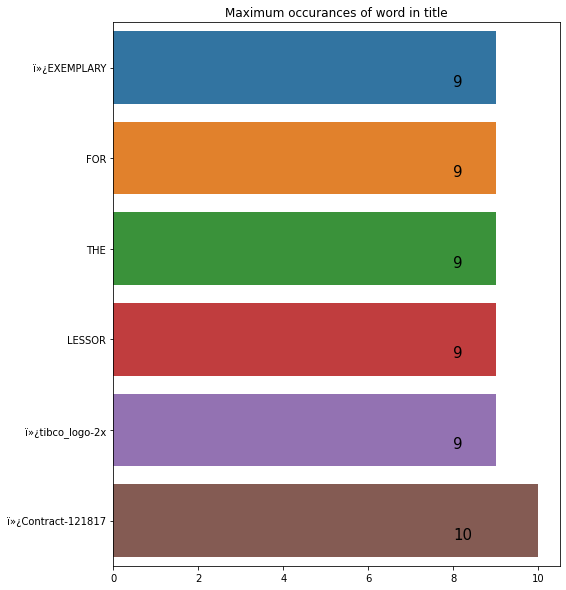

In [145]:
words=list(toptitles.keys())[:15]
vals=list(toptitles.values())[:15]
pl.figure(figsize=(8,10))
ax=sns.barplot(vals,words)
for i,j in enumerate(vals):
    ax.text(8,i+.2,j,fontsize=15)
    
pl.title('Maximum occurances of word in title')
pl.show()

In [146]:
categories=defaultdict(list)
for i in df['categories'].unique():
    temp=df[df['categories']==i]['article'].str.split().apply(len).values
    categories[i]=temp

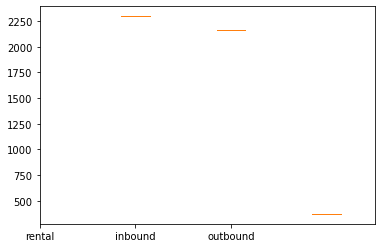

In [147]:
pl.boxplot(categories.values())

pl.xticks(range(3),categories.keys())
pl.show()

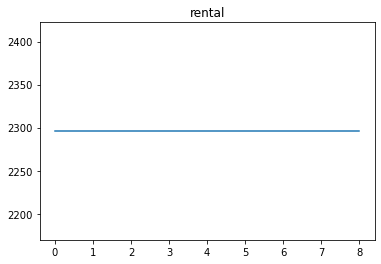

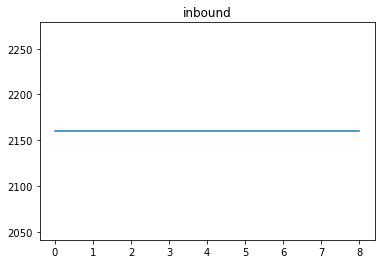

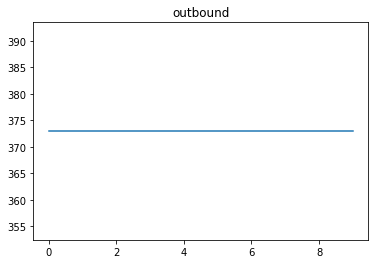

In [148]:
for i in categories.keys():
    pl.plot(categories[i])
    pl.title(i)
    pl.show()

In [149]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sahanaramesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [150]:
def Clean(text):
    text=text.split()
    text=[i.lower() for i in text if i.lower() not in stopwords.words('english')]
    text=' '.join(text)
    text=re.sub('[^A-Za-z0-9]+',' ',text)
    text=text.lower()
    return text

In [151]:
df['article']=df['article'].apply(lambda x: Clean(x))

In [152]:
df

,categories,text,title,article
0,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,lease contract use dwelling taxed vat identifi...
1,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,lease contract use dwelling taxed vat identifi...
2,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,lease contract use dwelling taxed vat identifi...
3,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,lease contract use dwelling taxed vat identifi...
4,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,lease contract use dwelling taxed vat identifi...
5,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,lease contract use dwelling taxed vat identifi...
6,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,lease contract use dwelling taxed vat identifi...
7,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,lease contract use dwelling taxed vat identifi...
8,rental,ï»¿EXEMPLARY FOR THE LESSOR\n \n ...,ï»¿EXEMPLARY FOR THE LESSOR,lease contract use dwelling taxed vat identifi...
9,inbound,ï»¿tibco_logo-2x \n ...,ï»¿tibco_logo-2x,contractor agreement contract 98449 contractor...


In [153]:
from sklearn.preprocessing import LabelEncoder
l_enc=LabelEncoder()

In [154]:
df['labels']=l_enc.fit_transform(df['categories'])

In [155]:
df_save = df[["categories", "labels"]]

In [156]:
df_save.to_csv("labels.csv")

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [164]:
X=tfidf.fit_transform(df['article'])
y=df['categories']

In [181]:
import joblib
filename = 'tfidf_model_contract'
joblib.dump(tfidf, filename)

['tfidf_model_contract']

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [167]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
#from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier

In [169]:
models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),
       MultinomialNB(),SVC(),PassiveAggressiveClassifier()]
scores=pd.DataFrame({'Model':[],'Train_Score':[],'Test_Score':[]})
for j,i in enumerate(models):
    i.fit(X_train,y_train)
    scores.loc[j,:]=[i,i.score(X_train,y_train),i.score(X_test,y_test)]
scores

/Users/sahanaramesh/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Model,Train_Score,Test_Score
0,LogisticRegression(),1.0,1.0
1,"(DecisionTreeClassifier(max_features='auto', r...",1.0,1.0
2,DecisionTreeClassifier(),1.0,1.0
3,MultinomialNB(),1.0,1.0
4,SVC(),1.0,1.0
5,PassiveAggressiveClassifier(),1.0,1.0


# Logistic Regression

In [170]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [171]:
clf.predict(X_train)

array(['outbound', 'inbound', 'rental', 'inbound', 'rental', 'rental',
       'rental', 'inbound', 'inbound', 'rental', 'outbound', 'inbound',
       'rental', 'inbound', 'outbound', 'inbound', 'inbound', 'outbound',
       'outbound'], dtype=object)

In [172]:
clf.predict(X_test)

array(['outbound', 'rental', 'outbound', 'rental', 'outbound', 'rental',
       'inbound', 'outbound', 'outbound'], dtype=object)

In [180]:
import joblib
filename = 'LR-model-Contract'
joblib.dump(clf, filename)

['LR-model-Contract']

# Prediction

In [174]:
text = """EXEMPLARY FOR THE LESSOR
         
        
                
        LEASE CONTRACT FOR USE OTHER THAN AS A DWELLING 


        TAXED BY VAT.


        IDENTIFICATION OF THE PREMISES THAT ARE THE OBJECT OF THE CONTRACT:




LOCAL DESTINED TO WAREHOUSE AND OFFICES.


C/ ____________ Nº_________


City: ____ Province: ____.  
        
CADASTRAL REFERENCE: __ __
                
                In ____, at ____, on the month of October two thousand to ____.
                Meeting on behalf of the TENANT _______________, of legal age, resident of _______________, c/ _____________ nº __, with NIF: 36.978.645-G, acting as joint and several Administrator of the company _______________, S.L." with CIF: B-_______________, domiciled at _______________.
                    And on the other party as LESSOR, _______________________________, of legal age, single, resident of _______________, with ID: ___.___-_.
                Both parties have contracted the lease of the premises identified in the heading of this contract, for a period of TEN _?______________ YEARS and an initial monthly rent of _______________ (.- €) EACH MONTH, payable in monthly instalments in advance, with the other conditions that will be attached to the contract, in additional sheets.
                This lease is subject to VAT, and by virtue of this, the total amount of each of the successive rental receipts will obligatorily accrue, according to the legal rate applicable at all times and automatically, the corresponding quota of VAT, which will appear separately from the rest of the concepts, each receipt being able to serve as an invoice.


     And for the record, both parties sign in duplicate in the city and on the date indicated above.


THE LESSEE THE LESSOR










COMPLEMENTARY CONDITIONS TO THE LEASE CONTRACT FOR USE OTHER THAN HOUSING DATED ___ / REFERRING TO THE PREMISES LOCATED AT _______________


1º.- The term of this contract is for TEN YEARS and shall commence as of today's date. When the contract expires, it may be renewed month by month, in accordance with the provisions of article 1566 of the Civil Code.


2.- With express waiver by the contracting parties of the provisions of article 34 of the LAU, it is agreed that the termination of the contract on expiry of the agreed term, even if the premises are not used for commercial retail activity, shall not entitle the lessee to any compensation whatsoever from the lessor.


3º.- The premises which are the object of this contract shall be used solely and exclusively for WAREHOUSE AND OFFICES.
 
4º.- The object of the lease is exclusively the surface located within the walls of the premises.
        The Lessee may decorate part of the façade with the sign that he deems appropriate and in accordance with the applicable municipal ordinances, provided that such installation does not cause damage to the property, being obliged to remove the same once the lease is terminated and to restore the façade to its original state.
 
5º.- With express waiver by the parties of the provisions of article 31 of the LAU, it is agreed that in the event of the sale of the leased premises as an independent property, the lessee shall not have the right of preferential acquisition of the same.


6º.- The lessee, expressly waiving the provisions of article 32 of the LAU, undertakes not to sublet, in whole or in part, or assign or transfer the leased premises without the express written consent of the lessor. In the event that the lessee fails to comply with this condition, the lessor may terminate the contract.
        Likewise, it is established that in the event that a Company is the lessee, the merger, transformation or spin-off of the latter will give rise to the termination of the contract.
        
7º.- The lessee declares to know the characteristics and state of conservation of the premises and expressly accepts them, as well as their urban qualification and the uses administratively permitted.


8º.- The acquisition, conservation, repair or replacement of the supply meters and the amount of the consumption are the exclusive responsibility of the lessee.
The premises are rented in the current state of the general connections and existing branches or lines corresponding to the same, for the supplies of which the property is equipped.
The tenant may arrange with the respective supply companies for all or some of the supplies that the property is equipped with, with total indemnity for the property.
If any modification has to be made, either in the general installations of the property or in the particular installations of the leased premises, the cost thereof shall be entirely at the expense of the lessee, in the event that he is interested and wishes to continue with the supply in question, but he must first submit to the owner, for his approval, the report and project of the variations to be made in each case, as required by the respective supply company.
                
9º.- Likewise, the tenant will be responsible for the expenses caused by the damages that may occur, whether they are glass, locks and other tools and utensils of the installations and their adequate maintenance, the expenses for the conservation and repair of the water, electricity, sanitary and service installations and in particular all the drains and blockages of the pipes, as well as the conservation, repair and replacement of blinds, in the event that such utensils and installations exist.


10º.- The property and the Manager shall be exempt from any liability for the lack of any supply.


11º.- The lessor assumes no liability whatsoever if the competent state or municipal bodies do not grant the lessee the opening or prohibit it once authorized. Taxes, duties, contributions and others that may be imposed, corresponding to the business or due to the same, are the sole responsibility of the lessee.


12.- The lessee is directly and exclusively responsible, and exempts the property and the Manager from all liability for any damage that may be caused to persons or things and are derived from installations for services and supplies of the leased premises.


13º.- The lessee may not carry out any kind of work on the premises without prior written permission from the owner or the Manager. In any case, the works thus authorised shall be at the expense of the lessee, and shall be for the benefit of the property, with no right to compensation or claim at any time whatsoever. The municipal permit will also be at the expense of the lessee, as well as the technical or facultative management, as the case may be.
                
14º.- The lessee, expressly waiving the provisions of article 30, in relation to article 21 of the LAU, undertakes to carry out at his own expense all the necessary repairs to the premises which are the object of the contract, in order to keep it in a state to serve for the agreed use; and during the execution of the same he shall not have the right to suspend the contract or to withdraw from it, nor to any compensation, nor to reduce or stop the payment of the rent. 


15º.- The contracting parties agree, expressly waiving the provisions of article 30 in relation to articles 22 and 26 of the L.A.U., that in the event that the lessor wishes to carry out improvement works in the building, he must notify the lessee in writing, at least three months in advance, who may not oppose the same without prejudice to the right he has to exercise within a period of one month from said notification, to terminate the contract if the works affect him in a relevant way. Likewise, the lessee waives any reduction in rent due to the part of the premises of which he is deprived because of the works and to receive compensation for the expenses that the works oblige him to incur.


16º.- The lessee undertakes:


A) Not to install transmissions, motors, machines, etc., which produce vibrations or noises which are a nuisance to the other occupants of the property or to those adjoining the property, or which may affect the consistency, solidity or conservation of the property.


B) Not to store or handle explosive, inflammable, uncomfortable or unhealthy materials in the premises, as well as to avoid any type of excess weight that may affect the solidity and conservation of the building and to observe at all times the provisions in force.


C) To allow access to the premises to the owner, to the Manager and to the workers or industrialists sent by either of them, in order to carry out, inspect and check any kind of works or repairs affecting the property.


17º.- The contracting parties agree that the total rent to be paid by the lessee at any given time, during the term of the contract or its extensions, will be adjusted each year to the percentage variation experienced by the General National Index of the Consumer Price Index System established by the National Institute of Statistics (or the body that replaces it), applying to that rent the percentage that represents the difference between the indices that correspond to the review period. For the application of the first update, the month of September 2_________ will be taken as the reference month, and for subsequent updates, the month corresponding to the last one applied.


        The updated rent will be payable to the lessee from the month following the month in which the interested party notifies the other party in writing, stating the percentage change applied. In no case shall the delay in applying the revision imply waiver or expiry of the same.


19º.- The lessee also undertakes:


A) To pay the rent, increases and legal increments and the expenses and services of the property, in advance at the address of the lessor -or the Manager, as the case may be, -within the first seven days of each agreed calendar period, without this direct debit ever being affected by any practice to the contrary. In the event of the bill being collected, to pay the corresponding collection premium. And in the event of such collection by direct debit, to pay any expenses or fees established by the bank or savings bank for such management or, where appropriate, refund.


B) To pay the expenses derived from this contract, such as stamp, management, registration, administrator's fees for its formalization and processing.


C) To the payment of the increase in the premium for the Fire Insurance or multi-risk insurance of the property, if this is due to the installation or nature of the business installed in the rented premises.


D) To satisfy any increases that may arise as a consequence of new taxes or due to increases in the rates of taxes, excise duties, rates and any other tax, service or supply levied on the property.
 
E) To the payment of the Value Added Tax, which at all times corresponds, applied to the total consideration. As well as to withhold 15% of the income, as provided for in current tax legislation.


F) To the payment of the Waste Management Fee in its entirety, as it is a service provided by the municipality for the exclusive benefit of the user.


G) To the payment of the amount corresponding to the Permanent Vado.


20º.- The lessee delivers in this act the sum of _______________ EUROS (_______________.-€) as a deposit. 
        The existence of this deposit shall never serve as a pretext for delaying the payment of the rent or of any of the sums for which the tenant has undertaken to pay.


21º.- _______________, with DNI_______________, whose other personal circumstances are already stated in the heading of this contract, BOND, GUARANTEE AND GUARANTEE personally, jointly and severally and indistinctly with their own assets the obligations assumed by the company "_______________." as Lessee of this contract during its validity as well as in its possible extensions or renewals, expressly waiving the benefits of excusion, order and division of assets.


22º.- In view of the expenses that the Lessee assumes at his exclusive cost and expense for the adaptation of the premises to the needs of the activity to be installed inside, it is agreed that the first rent to be paid will be that of _______________ in the amount of _______________ PLUS VAT (.- € + VAT). From December-06 and after, it will be the initially agreed rent of NINE HUNDRED AND FIFTY EUROS PLUS VAT per month. 


23º.- It is hereby stated for the record that inside the premises that are the object of this contract there is an elevator-lift installed for the exclusive use of goods that communicates with the three floors of the premises.
        The Lessor undertakes and undertakes that once this contract has been formalised and within a period of fifteen days from the date hereof, it will carry out the initial set-up of the said lift-lift installation, with the understanding that both the periodic maintenance required and any subsequent repairs of whatever nature shall be at the expense and cost of the Lessee.


        From this moment the Lessor is totally exonerated from any type of responsibility for the damages that this installation causes to people or things, assuming expressly the lessee that in no case it can be used by people, and it must be expressly stated by means of notices located in each one of the doors and in the cabin itself.


24º.- The parties, renouncing their own jurisdiction and domicile if they were others, submit to the competence and jurisdiction of the Courts and Tribunals of _______________ for any discrepancy, question or claim arising from the fulfilment or interpretation of this contract, designating the address for notifications of the Lessee entity as that of the premises object of this contract and that of the Lessor as that of its Administrator.
        
        And for the record and as proof of conformity, knowledge and acceptance, both parties sign this contract in duplicate and to a single effect in the city and on the date indicated in the heading.


THE LESSOR                                      THE LESSEE

"""

In [175]:
text

'EXEMPLARY FOR THE LESSOR\n         \n        \n                \n        LEASE CONTRACT FOR USE OTHER THAN AS A DWELLING \n\n\n        TAXED BY VAT.\n\n\n        IDENTIFICATION OF THE PREMISES THAT ARE THE OBJECT OF THE CONTRACT:\n\n\n\n\nLOCAL DESTINED TO WAREHOUSE AND OFFICES.\n\n\nC/ ____________ Nº_________\n\n\nCity: ____ Province: ____.  \n        \nCADASTRAL REFERENCE: __ __\n                \n                In ____, at ____, on the month of October two thousand to ____.\n                Meeting on behalf of the TENANT _______________, of legal age, resident of _______________, c/ _____________ nº __, with NIF: 36.978.645-G, acting as joint and several Administrator of the company _______________, S.L." with CIF: B-_______________, domiciled at _______________.\n                    And on the other party as LESSOR, _______________________________, of legal age, single, resident of _______________, with ID: ___.___-_.\n                Both parties have contracted the lease of t

In [176]:
text = Clean(text)

In [119]:
#text = [text]
#text

In [177]:
tfidf = joblib.load("tfidf_model_contract.sav")

In [178]:
X_pred = tfidf.transform([text]).todense()

In [179]:
clf = joblib.load("LR-model-Contract.sav")
prediction = clf.predict(X_pred)
prediction[0]

'rental'